In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

In [5]:
count = 0

for file in os.listdir('../dataset/fasta_mut'):
    seq_wt = str(SeqIO.read(os.path.join('../dataset/fasta_mut', f"{file}"), "fasta").seq)
    if len(seq_wt) > 1024:
        count += 1

print(count)

730


In [2]:
dataProtein = pd.read_csv('../dataset/data_train.csv')
dataProtein.drop(columns=['Unnamed: 0'], inplace=True)
dataProtein

,uniprot_id,wildtype,position,mutation,pdb_id,pdb_pos,phenotypic_annotation,interaction,binding,function,...,sumoylation,acetylation,other_ptm,methylation,ribosylation,subcell_localization_change,mimetic_ptm,folding,expression,identifier
0,P31749,K,8,R,1unp:A,8,"Substantial reduction of ubiquitination, phosp...",NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,P31749_K_8_R
1,P31749,K,14,A,1unp:A,14,"Impairs interaction with PtdIns(3,4,5)P3 and P...",NaN,-1.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P31749_K_14_A
2,P31749,K,14,Q,1unp:A,14,Substantial reduction of phosphorylation at T-...,NaN,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,P31749_K_14_Q
3,P31749,K,14,R,1unp:A,14,"Substantial reduction of ubiquitination, phosp...",NaN,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,P31749_K_14_R
4,P31749,E,17,K,1unp:A,17,No effect on membrane localization. Loss of me...,NaN,NaN,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P31749_E_17_K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,Q16665,S,247,D,4h6j:A,247,Impaired kinase activity.,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q16665_S_247_D
8431,Q16665,L,795,A,1l8c:B,118,Inhibits interaction with EP300 and transactiv...,-1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q16665_L_795_A
8432,Q16665,C,800,A,1l8c:B,123,Blocks increase in transcriptional activation ...,NaN,NaN,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q16665_C_800_A
8433,Q16665,C,800,S,1l8c:B,123,Abolishes hypoxia-inducible transcriptional ac...,NaN,NaN,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q16665_C_800_S


In [12]:
import os
from Bio import SeqIO

embeddings_per_position = [[] for _ in range(41)]

for file in os.listdir('../dataset/fasta_mut'):
    seq_record_wt = SeqIO.read(os.path.join('../dataset/fasta', f'{file.split("_")[0]}.fasta'), "fasta")
    seq_record_mut = SeqIO.read(os.path.join('../dataset/fasta_mut', file), "fasta")
    seq_wt = str(seq_record_wt.seq)
    seq_mut = str(seq_record_mut.seq)

    for i, (aa_wt, aa_mut) in enumerate(zip(seq_wt, seq_mut)):
        if aa_wt != aa_mut:
            position = i
            break

    if len(seq_wt) > 1022:
        position = 500

    data = np.load(f'../embedding/fastaEmb/{file.split(".")[0]}.npz')
    matrix = data.f.arr_0
    
    start = max(0, position - 20)
    end = min(len(matrix), position + 21)

    for j, pos in enumerate(range(start, end)):
        if pos < len(matrix):
            embeddings_per_position[j].append(matrix[pos, :])

mean_embeddings = [np.mean(embeddings, axis=0) for embeddings in embeddings_per_position]

plt.figure(figsize=(12, 6))
for i, mean_embedding in enumerate(mean_embeddings):
    plt.plot(mean_embedding, label=f'Posizione {i - 20}')

plt.xlabel('Dimensione embedding')
plt.ylabel('Media valore embedding')
plt.title('Media dei valori di embedding per ciascuna posizione relativa alla mutazione')
plt.legend(loc='upper right', ncol=3, fontsize='small')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [7]:
data = np.load('../embedding/fastaEmb/A0AVK6_R_156_A.npz')
matrix = data.f.arr_0

In [8]:
print("Dimensione della matrice:", matrix.shape)

Dimensione della matrice: (867, 1280)


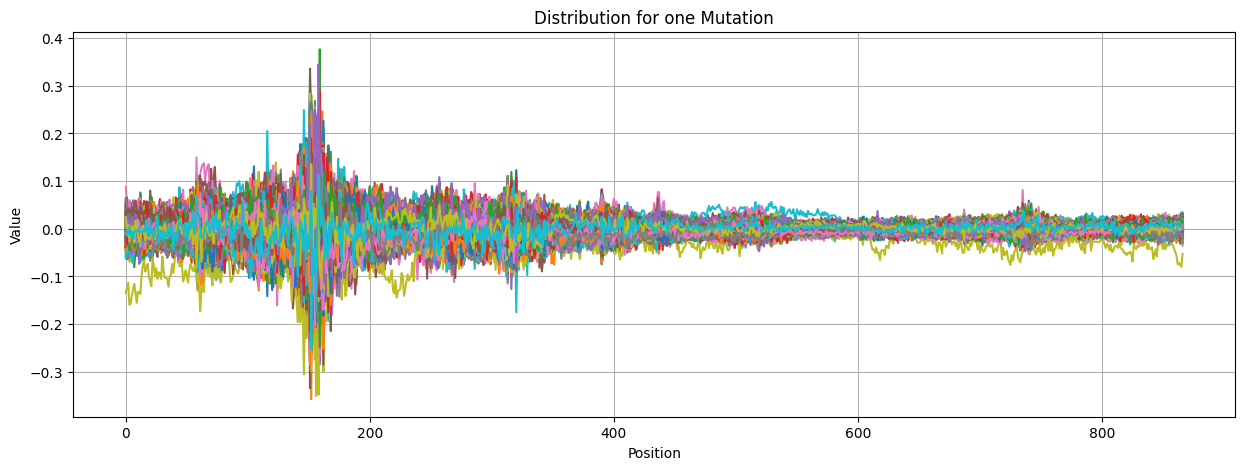

In [9]:
num_positions = matrix.shape[0]
num_features = matrix.shape[1]

plt.figure(figsize=(15, 5))

for i in range(num_features):
    plt.plot(np.arange(num_positions), matrix[:, i], label=f"Feature {i+1}")

plt.title("Distribution for one Mutation")
plt.xlabel("Position")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Plotting Labels

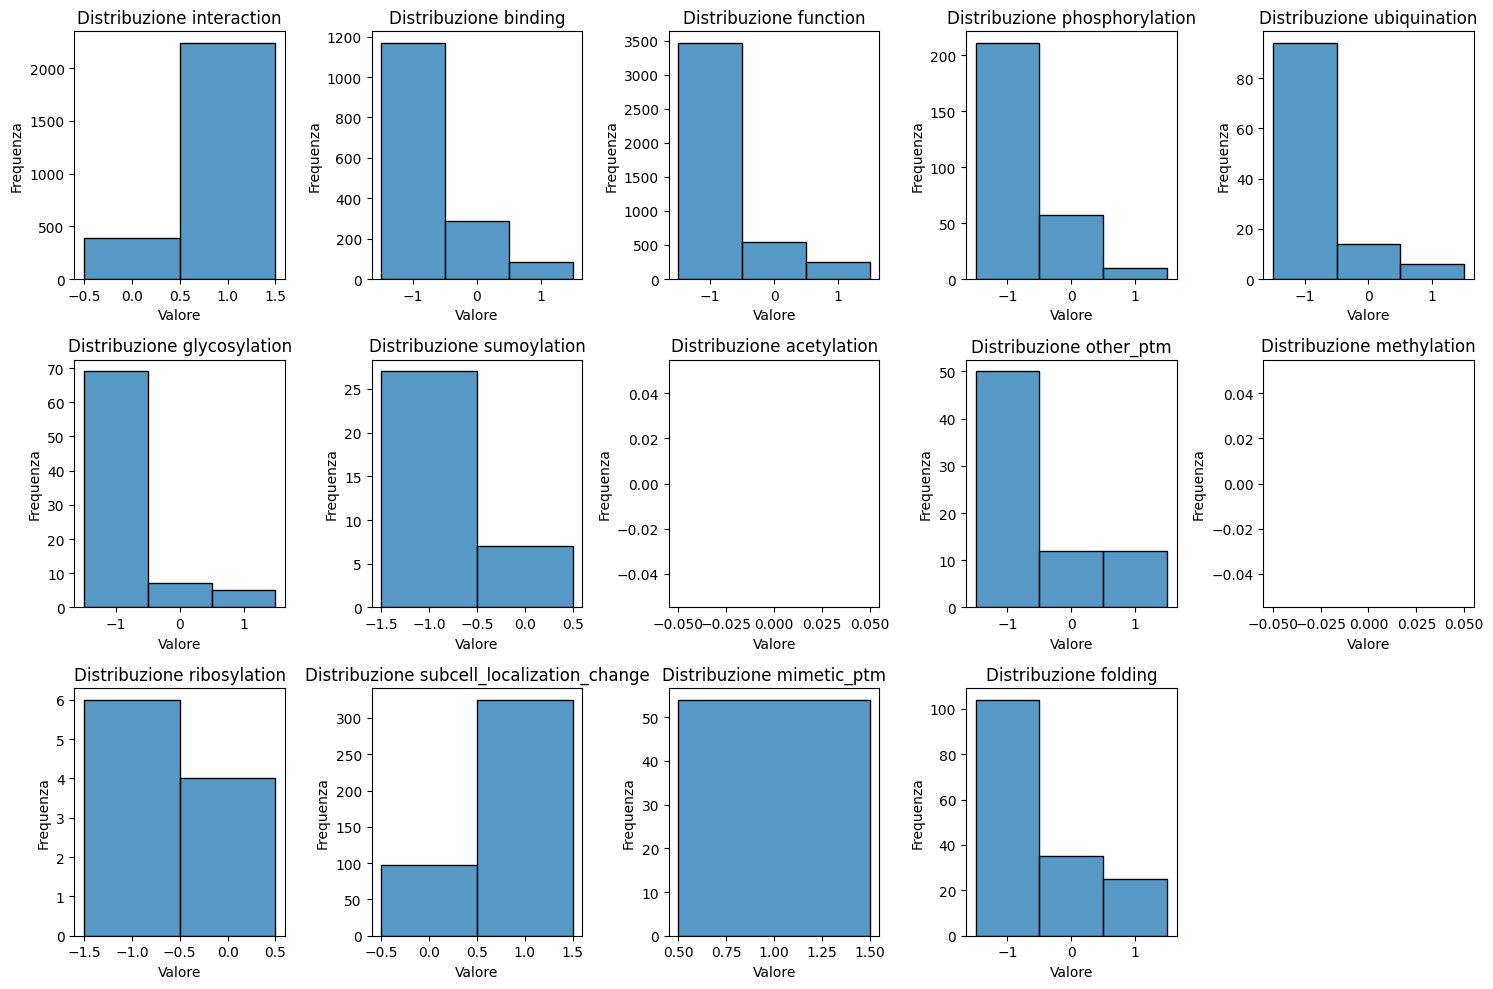

In [8]:
last_15_columns = dataProtein.iloc[:, -16:-2]
filtered_data = last_15_columns.replace(-999, pd.NA)

plt.figure(figsize=(15, 10))

for i, col in enumerate(filtered_data.columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(filtered_data[col].dropna(), bins=3, kde=False, discrete=True) # type: ignore
    plt.title(f"Distribuzione {col}")
    plt.xlabel("Valore")
    plt.ylabel("Frequenza")

plt.tight_layout()
plt.show()